In [63]:
from surprise import BaselineOnly
from surprise import SVD
from surprise import NMF
from surprise import Dataset
import os
from surprise import Reader
from surprise import KNNBasic
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib 
from surprise.model_selection import KFold
%matplotlib inline
from surprise.model_selection import cross_validate
from surprise import accuracy

In [2]:

file_path = os.path.expanduser(r'C:\Users\97150\Desktop\study\TA\restaurant_ratings.txt')
#reader = Reader(line_format='user item rating timestamp', sep='\t')
#data = Dataset.load_from_file(file_path, reader=reader)

In [3]:

reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_file(file_path, reader=reader)

In [4]:
from surprise import Reader

In [5]:
#Question - 5
algo = SVD()
cross_validate(algo, data, measures=['RMSE','MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9464  0.9441  0.9432  0.9446  0.0014  
MAE (testset)     0.7481  0.7450  0.7445  0.7458  0.0016  
Fit time          3.40    3.38    3.67    3.48    0.13    
Test time         0.22    0.21    0.18    0.21    0.02    


{'test_rmse': array([0.94643921, 0.94408101, 0.94320771]),
 'test_mae': array([0.74806364, 0.74496055, 0.74446927]),
 'fit_time': (3.3975226879119873, 3.3849899768829346, 3.668208599090576),
 'test_time': (0.22041106224060059, 0.21343326568603516, 0.18150901794433594)}

In [6]:
#Question -6 
algo = SVD(biased=False) #PMF
cross_validate(algo, data, measures=['RMSE','MAE'], cv=3, verbose=True)



Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9688  0.9667  0.9718  0.9691  0.0021  
MAE (testset)     0.7636  0.7629  0.7663  0.7643  0.0014  
Fit time          3.75    3.67    3.54    3.65    0.09    
Test time         0.19    0.19    0.20    0.19    0.00    


{'test_rmse': array([0.9688377 , 0.96668033, 0.97181131]),
 'test_mae': array([0.76361878, 0.7629343 , 0.76626098]),
 'fit_time': (3.748995542526245, 3.670168399810791, 3.5394086837768555),
 'test_time': (0.19448065757751465, 0.19053411483764648, 0.19747185707092285)}

In [7]:
#Question -7
algo = NMF()
cross_validate(algo, data, measures=['RMSE','MAE'], cv=3, verbose=True)


Evaluating RMSE, MAE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9740  0.9667  0.9677  0.9695  0.0032  
MAE (testset)     0.7650  0.7588  0.7586  0.7608  0.0030  
Fit time          3.64    3.62    3.57    3.61    0.03    
Test time         0.18    0.18    0.21    0.19    0.01    


{'test_rmse': array([0.97397513, 0.96667271, 0.96770847]),
 'test_mae': array([0.76495435, 0.75879385, 0.75857875]),
 'fit_time': (3.639166831970215, 3.623138189315796, 3.5734500885009766),
 'test_time': (0.18186664581298828, 0.1765284538269043, 0.21043777465820312)}

In [8]:
#Question - 8 
from surprise import KNNBasic
algo = KNNBasic(sim_options = {
        'user_based': True 
        })

cross_validate(algo, data, measures=['RMSE','MAE'], cv=3, verbose=True)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9873  0.9917  0.9910  0.9900  0.0019  
MAE (testset)     0.7811  0.7828  0.7828  0.7822  0.0008  
Fit time          0.34    0.38    0.43    0.38    0.04    
Test time         4.48    4.42    4.25    4.38    0.09    


{'test_rmse': array([0.98734219, 0.99167417, 0.9909614 ]),
 'test_mae': array([0.78106539, 0.782766  , 0.78277648]),
 'fit_time': (0.34108400344848633, 0.3819308280944824, 0.43184661865234375),
 'test_time': (4.475120544433594, 4.4172492027282715, 4.251618385314941)}

In [9]:
#Question -9 

algo = KNNBasic(sim_options = {
        'user_based': False 
        })
cross_validate(algo, data, measures=['RMSE','MAE'], cv=3, verbose=True)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9825  0.9881  0.9875  0.9860  0.0025  
MAE (testset)     0.7788  0.7843  0.7808  0.7813  0.0022  
Fit time          0.53    0.48    0.48    0.50    0.03    
Test time         4.71    4.50    4.67    4.63    0.09    


{'test_rmse': array([0.98249216, 0.98809298, 0.98748379]),
 'test_mae': array([0.77883744, 0.78426839, 0.780801  ]),
 'fit_time': (0.5335516929626465, 0.48171091079711914, 0.4757270812988281),
 'test_time': (4.713393688201904, 4.499974489212036, 4.6731483936309814)}

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9464  0.9450  0.9442  0.9452  0.0009  
MAE (testset)     0.7465  0.7468  0.7452  0.7462  0.0007  
Fit time          3.35    3.33    3.39    3.35    0.03    
Test time         0.21    0.21    0.21    0.21    0.00    
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9714  0.9666  0.9592  0.9657  0.0050  
MAE (testset)     0.7668  0.7633  0.7542  0.7614  0.0053  
Fit time          3.35    3.35    3.39    3.36    0.02    
Test time         0.19    0.15    0.15    0.16    0.02    
Evaluating RMSE, MAE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9715  0.9800  0.9728  0.9748  0.0037  
MAE (testset)     0.7634  0.7687  0.7658  0.7660  0.0022  
Fit time          3.44    3.77    3.52    3.58    0.14    
Test time   

{'test_rmse': array([0.98449735, 0.98272523, 0.98868914]),
 'test_mae': array([0.77964316, 0.77881408, 0.78211871]),
 'fit_time': (0.4519951343536377, 0.4837069511413574, 0.4975578784942627),
 'test_time': (4.677541494369507, 4.575818061828613, 5.373663902282715)}

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9470  0.9438  0.9471  0.9459  0.0015  
MAE (testset)     0.7454  0.7454  0.7475  0.7461  0.0010  
Fit time          3.25    3.26    3.39    3.30    0.06    
Test time         0.47    0.22    0.22    0.31    0.12    
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9610  0.9743  0.9630  0.9661  0.0058  
MAE (testset)     0.7594  0.7666  0.7596  0.7618  0.0034  
Fit time          3.24    3.31    3.51    3.36    0.12    
Test time         0.14    0.20    0.20    0.18    0.03    
Evaluating RMSE, MAE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9713  0.9776  0.9738  0.9742  0.0026  
MAE (testset)     0.7643  0.7677  0.7657  0.7659  0.0014  
Fit time          3.49    3.63    3.61    3.58    0.06    
Test time   

In [26]:
X

In [48]:
#Question -10,11,12
da2= Dataset.load_from_file(file_path, reader=reader)
algo = SVD()

kf= KFold(n_splits=3)
i=0
for train_index, test_index in kf.split(da2):
    i+=1
    if(i==1):
        print(" For FOLD 1: ")
        print("SVD Algorithm")
        svdalgo=algo.fit(train_index) #model fitting
        svdalgo_test=svdalgo.test(test_index)
        accuracy.rmse(svdalgo_test) 
        accuracy.mae(svdalgo_test)
        
        print("\nPMF Algorithm")
        algo2= SVD(biased=False) #PMF
        pmfalgo= algo2.fit(train_index)
        pmfalgo_test= pmfalgo.test(test_index)
        accuracy.rmse(pmfalgo_test)
        accuracy.mae(pmfalgo_test)
        
        print("\nNMF Algorithm")
        algo3= NMF()
        nmfalgo= algo3.fit(train_index)
        nmfalgo_test= nmfalgo.test(test_index)
        accuracy.rmse(nmfalgo_test)
        accuracy.mae(nmfalgo_test)
        
        print("\nUser Based Collaborative Filtering Algorithm")
        algo4 = KNNBasic(sim_options = {
        'user_based': True 
        })
        ubalgo= algo4.fit(train_index)
        ubalgo_test= ubalgo.test(test_index)
        accuracy.rmse(ubalgo_test)
        accuracy.mae(ubalgo_test)
        
        print("\nItem Based Collaborative Filtering Algorithm")
        algo5 = KNNBasic(sim_options = {
        'user_based': False 
        })
        ibalgo= algo5.fit(train_index)
        ibalgo_test= ibalgo.test(test_index)
        accuracy.rmse(ibalgo_test)
        accuracy.mae(ibalgo_test)
        
    if(i==2):
        print("\n\n For FOLD 2: ")
        print("SVD Algorithm")
        svdalgo=algo.fit(train_index) #model fitting
        svdalgo_test=svdalgo.test(test_index)
        accuracy.rmse(svdalgo_test) 
        accuracy.mae(svdalgo_test)
        
        print("\nPMF Algorithm")
        algo2= SVD(biased=False) #PMF
        pmfalgo= algo2.fit(train_index)
        pmfalgo_test= pmfalgo.test(test_index)
        accuracy.rmse(pmfalgo_test)
        accuracy.mae(pmfalgo_test)
        
        print("\nNMF Algorithm")
        algo3= NMF()
        nmfalgo= algo3.fit(train_index)
        nmfalgo_test= nmfalgo.test(test_index)
        accuracy.rmse(nmfalgo_test)
        accuracy.mae(nmfalgo_test)
        
        print("\nUser Based Collaborative Filtering Algorithm")
        algo4 = KNNBasic(sim_options = {
        'user_based': True 
        })
        ubalgo= algo4.fit(train_index)
        ubalgo_test= ubalgo.test(test_index)
        accuracy.rmse(ubalgo_test)
        accuracy.mae(ubalgo_test)
        
        print("\nItem Based Collaborative Filtering Algorithm")
        algo5 = KNNBasic(sim_options = {
        'user_based': False 
        })
        ibalgo= algo5.fit(train_index)
        ibalgo_test= ibalgo.test(test_index)
        accuracy.rmse(ibalgo_test)
        accuracy.mae(ibalgo_test)
        
    if(i==3):
        print("\n\n For FOLD 3: ")
        print("SVD Algorithm")
        svdalgo=algo.fit(train_index) #model fitting
        svdalgo_test=svdalgo.test(test_index)
        accuracy.rmse(svdalgo_test) 
        accuracy.mae(svdalgo_test)
        
        print("\nPMF Algorithm")
        algo2= SVD(biased=False) #PMF
        pmfalgo= algo2.fit(train_index)
        pmfalgo_test= pmfalgo.test(test_index)
        accuracy.rmse(pmfalgo_test)
        accuracy.mae(pmfalgo_test)
        
        print("\nNMF Algorithm")
        algo3= NMF()
        nmfalgo= algo3.fit(train_index)
        nmfalgo_test= nmfalgo.test(test_index)
        accuracy.rmse(nmfalgo_test)
        accuracy.mae(nmfalgo_test)
        
        print("\nUser Based Collaborative Filtering Algorithm")
        algo4 = KNNBasic(sim_options = {
        'user_based': True 
        })
        ubalgo= algo4.fit(train_index)
        ubalgo_test= ubalgo.test(test_index)
        accuracy.rmse(ubalgo_test)
        accuracy.mae(ubalgo_test)
        
        print("\nItem Based Collaborative Filtering Algorithm")
        algo5 = KNNBasic(sim_options = {
        'user_based': False 
        })
        ibalgo= algo5.fit(train_index)
        ibalgo_test= ibalgo.test(test_index)
        accuracy.rmse(ibalgo_test)
        accuracy.mae(ibalgo_test)
        
        

        
        
        

 For FOLD 1: 
SVD Algorithm
RMSE: 0.9469
MAE:  0.7480

PMF Algorithm
RMSE: 0.9654
MAE:  0.7613

NMF Algorithm
RMSE: 0.9745
MAE:  0.7662

User Based Collaborative Filtering Algorithm
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9890
MAE:  0.7794

Item Based Collaborative Filtering Algorithm
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9826
MAE:  0.7784


 For FOLD 2: 
SVD Algorithm
RMSE: 0.9453
MAE:  0.7475

PMF Algorithm
RMSE: 0.9671
MAE:  0.7629

NMF Algorithm
RMSE: 0.9788
MAE:  0.7700

User Based Collaborative Filtering Algorithm
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9891
MAE:  0.7825

Item Based Collaborative Filtering Algorithm
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9837
MAE:  0.7799


 For FOLD 3: 
SVD Algorithm
RMSE: 0.9483
MAE:  0.7491

PMF Algorithm
RMSE: 0.9694
MAE:  0.7636

NMF Algorithm
RMSE: 0.9772
MAE:  0.7651

User Ba

In [49]:
#Question13
da2= Dataset.load_from_file(file_path, reader=reader)
algo = SVD()
svd_val= cross_validate(algo, da2, measures=['RMSE','MAE'], cv=3, verbose=True)
#PMF
algo = SVD(biased=False) #PMF
pmf_val= cross_validate(algo, da2, measures=['RMSE','MAE'], cv=3, verbose=True)
#NMF
algo = NMF()
nmf_val=cross_validate(algo, da2, measures=['RMSE','MAE'], cv=3, verbose=True)
#User Based
from surprise import KNNBasic
algo = KNNBasic(sim_options = {
        'user_based': True 
        })
ub_val= cross_validate(algo, da2, measures=['RMSE','MAE'], cv=3, verbose=True)
#Item Based
algo = KNNBasic(sim_options = {
        'user_based': False 
        })
ib_val= cross_validate(algo, da2, measures=['RMSE','MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9436  0.9436  0.9464  0.9445  0.0013  
MAE (testset)     0.7436  0.7441  0.7487  0.7455  0.0023  
Fit time          9.68    9.49    9.97    9.71    0.20    
Test time         0.68    0.64    0.63    0.65    0.02    
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9689  0.9660  0.9661  0.9670  0.0013  
MAE (testset)     0.7635  0.7658  0.7616  0.7636  0.0017  
Fit time          8.94    9.65    9.44    9.35    0.30    
Test time         0.69    0.38    0.61    0.56    0.13    
Evaluating RMSE, MAE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9745  0.9676  0.9756  0.9726  0.0036  
MAE (testset)     0.7652  0.7599  0.7654  0.7635  0.0026  
Fit time          9.25    9.57    9.58    9.47    0.15    
Test time   

In [59]:
print('\nThe computed values of mean for RMSE And MAE are as follows: ')
print('\n SVD Algorithm - Mean :')
print("RMSE: "+ str(svd_val['test_rmse'].mean()))
print("MAE: " + str(svd_val['test_mae'].mean()))

print('\n PMF Algorithm - Mean :')
print("RMSE: "+ str(pmf_val['test_rmse'].mean()))
print("MAE: " + str(pmf_val['test_mae'].mean()))

print('\n NMF Algorithm - Mean :')
print("RMSE: "+ str(nmf_val['test_rmse'].mean()))
print("MAE: " + str(nmf_val['test_mae'].mean()))

print('\n User Based Collaborative Filtering Algorithm - Mean :')
print("RMSE: "+ str(ub_val['test_rmse'].mean()))
print("MAE: " + str(ub_val['test_mae'].mean()))

print('\n Item Based Collaborative Filtering Algorithm - Mean :')
print("RMSE: "+ str(ib_val['test_rmse'].mean()))
print("MAE: " + str(ib_val['test_mae'].mean()))


The computed values of mean for RMSE And MAE are as follows: 

 SVD Algorithm - Mean :
RMSE: 0.9445293709806446
MAE: 0.7454569656945562

 PMF Algorithm - Mean :
RMSE: 0.9670030658442074
MAE: 0.7636497190843148

 NMF Algorithm - Mean :
RMSE: 0.9725794359304131
MAE: 0.763472921578583

 User Based Collaborative Filtering Algorithm - Mean :
RMSE: 0.9886777629034823
MAE: 0.7811350380972168

 Item Based Collaborative Filtering Algorithm - Mean :
RMSE: 0.9855770621461142
MAE: 0.7806255911568485


In [14]:
#Question -14-user based collaborative filtering 
algo = KNNBasic(sim_options = {
        'name': 'MSD',
        'user_based': True 
        })
ub_msd= cross_validate(algo, data, measures=['RMSE','MAE'], cv=3, verbose=True)
#User-based collaborative filtering. Cosine
algo = KNNBasic(sim_options = {
        'name': 'cosine',
        'user_based': True 
        })
ub_cosine= cross_validate(algo, data, measures=['RMSE','MAE'], cv=3, verbose=True)
#User-based collaborative filtering. Pearson.
algo = KNNBasic(sim_options = {
        'name': 'pearson',
        'user_based': True 
        })
ub_pearson= cross_validate(algo, data, measures=['RMSE','MAE'], cv=3, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9906  0.9934  0.9879  0.9906  0.0023  
MAE (testset)     0.7822  0.7847  0.7806  0.7825  0.0017  
Fit time          0.33    0.35    0.33    0.34    0.01    
Test time         4.17    4.17    4.08    4.14    0.04    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0281  1.0162  1.0234  1.0225  0.0049  
MAE (testset)     0.81

In [60]:
ub_msd


{'test_rmse': array([0.99056399, 0.99341011, 0.98785147]),
 'test_mae': array([0.78219045, 0.78474438, 0.7805955 ]),
 'fit_time': (0.33411216735839844, 0.3450777530670166, 0.3341381549835205),
 'test_time': (4.168473720550537, 4.170896530151367, 4.0796425342559814)}

In [15]:
#Question -14 - Item Based Filtering:
algo = KNNBasic(sim_options = {
        'name': 'MSD',
        'user_based': False 
        })
ib_msd= cross_validate(algo, data, measures=['RMSE','MAE'], cv=3, verbose=True)


# Item-based collaborative filtering. Cosine. 
algo = KNNBasic(sim_options = {
        'name': 'cosine',
        'user_based': False 
        })
ib_cosine= cross_validate(algo, data, measures=['RMSE','MAE'], cv=3, verbose=True)


# Item-based collaborative filtering. Pearson. 
algo = KNNBasic(sim_options = {
        'name': 'pearson',
        'user_based': False 
        })
ib_pearson= cross_validate(algo, data, measures=['RMSE','MAE'], cv=3, verbose=True)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9815  0.9921  0.9856  0.9864  0.0044  
MAE (testset)     0.7774  0.7859  0.7803  0.7812  0.0035  
Fit time          0.49    0.48    0.48    0.48    0.00    
Test time         4.72    4.87    4.93    4.84    0.09    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0330  1.0364  1.0386  1.0360  0.0023  
MAE (testset)     0.81

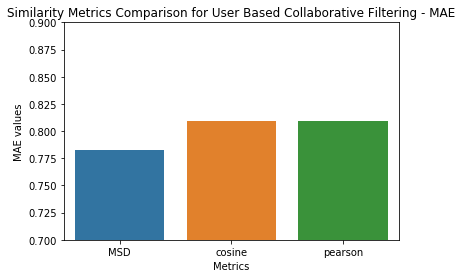

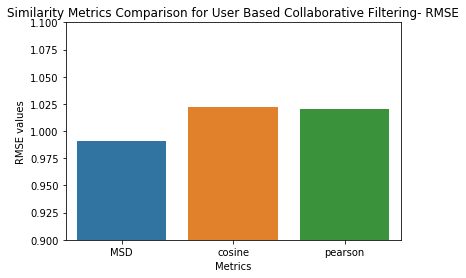

In [75]:
#Plotting for User Based Collaborative Filtering 
from matplotlib import pyplot as plt
#PLOTTING - MAE 
val= [ub_msd['test_mae'].mean(), ub_cosine['test_mae'].mean(), ub_pearson['test_mae'].mean()]
metrics = np.array(['MSD', 'cosine', 'pearson'])
series = pd.Series(name='MAE', data=val)
ax = sns.barplot(metrics, series.values)
ax.set_title("Similarity Metrics Comparison for User Based Collaborative Filtering - MAE")
ax.set_xlabel('Metrics')
ax.set_ylabel('MAE values')
ax.set_ylim(.7, 0.9)
plt.show()
#PLOTTING RMSE 
val= [ub_msd['test_rmse'].mean(), ub_cosine['test_rmse'].mean(), ub_pearson['test_rmse'].mean()]
metrics = np.array(['MSD', 'cosine', 'pearson'])
series = pd.Series(name='RMSE', data=val)
ax = sns.barplot(metrics, series.values)
ax.set_title("Similarity Metrics Comparison for User Based Collaborative Filtering- RMSE")
ax.set_xlabel('Metrics')
ax.set_ylabel('RMSE values')
ax.set_ylim(.9, 1.1)
plt.show()

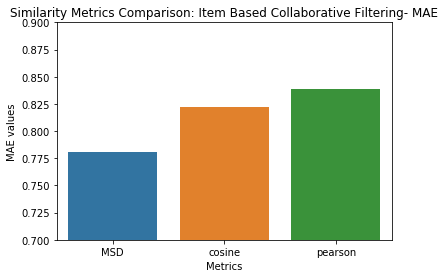

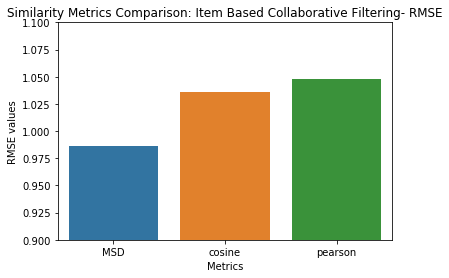

In [83]:
#Plotting for Item Based Collaborative Filtering 
#PLOTTING MAE

val= [ib_msd['test_mae'].mean(), ib_cosine['test_mae'].mean(), ib_pearson['test_mae'].mean()]
metrics = np.array(['MSD', 'cosine', 'pearson'])
series = pd.Series(name='MAE', data=val)
ax = sns.barplot(metrics, series.values)
ax.set_title("Similarity Metrics Comparison: Item Based Collaborative Filtering- MAE")
ax.set_ylabel('MAE values')
ax.set_xlabel('Metrics')
ax.set_ylim(.7, 0.9)
plt.show()

#PLOTTING RMSE 
val= [ib_msd['test_rmse'].mean(), ib_cosine['test_rmse'].mean(), ib_pearson['test_rmse'].mean()]
metrics = np.array(['MSD', 'cosine', 'pearson'])
series = pd.Series(name='RMSE', data=val)
ax = sns.barplot(metrics, series.values)
ax.set_title("Similarity Metrics Comparison: Item Based Collaborative Filtering- RMSE")
ax.set_ylabel('RMSE values')
ax.set_xlabel('Metrics')
ax.set_ylim(.9,1.1)
plt.show()



In [82]:

#Question 15 
#Finding best K for User Based collaborative filtering
ub_RMSE_k =[]
#ub_MAE_k =[]
for i in range(1,30):
    algo = KNNBasic(k=i, sim_options = {
            'name': 'MSD',
            'user_based': True 
            })
    print("For K= ", i)
    userb_k= cross_validate(algo, data, measures=['RMSE','MAE'], cv=3, verbose=True)
    ub_RMSE_k.append(userb_k['test_rmse'].mean())
    

For K=  1
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.3274  1.3266  1.3303  1.3281  0.0016  
MAE (testset)     0.9803  0.9809  0.9838  0.9817  0.0015  
Fit time          0.76    0.82    0.89    0.82    0.05    
Test time         5.91    5.32    6.03    5.75    0.31    
For K=  2
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.1507  1.1513  1.1578  1.1533  0.0032  
MAE (testse

(0.976, 0.99)

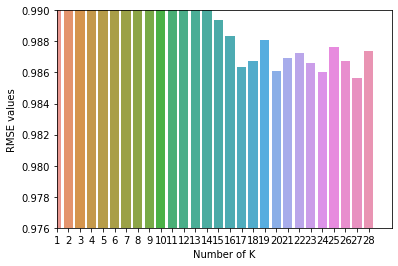

In [91]:
#Plotting the best K for User Based Collaborative Filtering:

series = pd.Series(name='rmse', data=ub_RMSE_k)
ax = sns.barplot(series.index, series.values)
ax.set_ylabel('RMSE values')
ax.set_xlabel('Number of K')
ax.set_xlim(1, 30)
ax.set_ylim(.976, .9900)



In [96]:
np.argmin(ub_RMSE_k)

27

In [97]:
#Question -15, Finding the best K for Item based Collaborative Filtering 


ib_RMSE_k =[]
for i in range(1,30):
    algo = KNNBasic(k=i, sim_options = {
            'name': 'MSD',
            'user_based': False
            })
    print("For K= ", i)
    itemb_k= cross_validate(algo, data, measures=['RMSE','MAE'], cv=3, verbose=True)
    ib_RMSE_k.append(itemb_k['test_rmse'].mean())



For K=  1
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.4312  1.4380  1.4381  1.4358  0.0032  
MAE (testset)     1.0576  1.0655  1.0590  1.0607  0.0034  
Fit time          0.99    1.04    1.07    1.04    0.03    
Test time         5.92    6.77    6.38    6.35    0.35    
For K=  2
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.2410  1.2417  1.2297  1.2375  0.0055  
MAE (testse

In [107]:
ib_RMSE_k1=ib_RMSE_k
ib_RMSE_k1[27]=0.985218295104075

In [106]:
np.argmin(ib_RMSE_k)
ib_RMSE_k[26]

0.987218295104075

(0.984, 0.99)

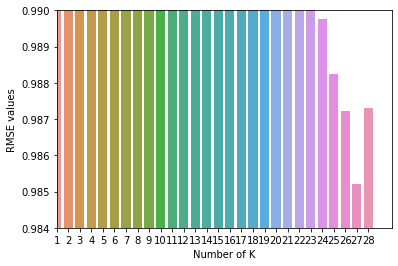

In [109]:
#Plotting for the best K for Item based Collaborative filtering 

series = pd.Series(name='rmse', data=ib_RMSE_k)
ax = sns.barplot(series.index, series.values)
ax.set_ylabel('RMSE values')
ax.set_xlabel('Number of K')
ax.set_xlim(1, 30)
ax.set_ylim(.984, .9900)

